# 정답 코드

2000-2021년 중 서울의 평균 온도가 가장 높았던 날은 2018-08-02 로 33.7 도 였습니다
2000-2021년 중 서울의 평균 온도가 가장 낮았던 날은 2001-01-15 로 -15.5 도 였습니다


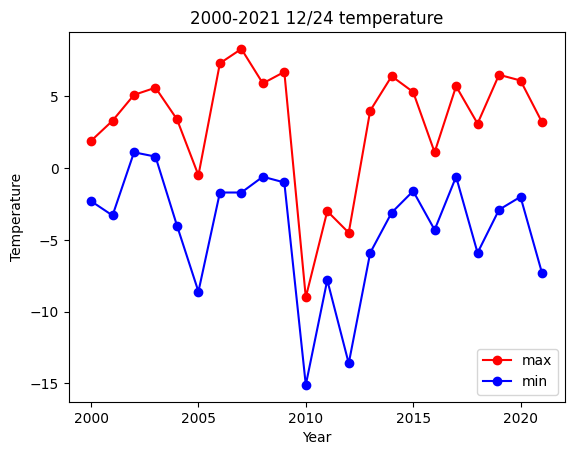

In [18]:
import csv
import matplotlib.pyplot as plt

f=open('/content/drive/MyDrive/고급파이썬프로그래밍/과제2/report2.csv')

data = csv.reader(f)
header = next(data)

max_temp = -999
max_date = ''
min_temp = 999
min_date = ''
dec_max = []
dec_min = []

for row in data:

    # 데이터 전처리
    row[0] = row[0].replace('\t', '')

    # IndexError 해결: 빈 셀은 건너뛰기
    if row[1] == '':
        continue

    if row[2] == '':            # 가장 높았던 평균기온 구하기
        row[2] = -999
    row[2] = float(row[2])
    if max_temp < row[2]:
        max_temp = row[2]
        max_date = row[0]

    if row[2] == '':            # 가장 낮았던 평균기온 구하기
        row[2] = 999
    row[2] = float(row[2])
    if min_temp > row[2]:
        min_temp = row[2]
        min_date = row[0]

    month = row[0].split('-')[1]
    date = row[0].split('-')[2]

    if row[-1] != '':           # 12/24의 최고기온
        if month == '12' and date == '24':
            dec_max.append(float(row[-1]))

    if row[-2] != '':           # 12/24의 최저기온
        if month == '12' and date == '24':
            dec_min.append(float(row[-2]))


print('2000-2021년 중 서울의 평균 온도가 가장 높았던 날은',max_date,'로', max_temp,'도 였습니다')
print('2000-2021년 중 서울의 평균 온도가 가장 낮았던 날은',min_date,'로', min_temp,'도 였습니다')

# 직선그래프
year = []
for i in range(2000,2022):
    year.append(i)
plt.plot(year, dec_max, 'ro-',label='max')
plt.plot(year, dec_min, 'bo-',label='min')
plt.legend(loc='lower right')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('2000-2021 12/24 temperature')

#히스토그램
'''
plt.hist(dec_max, bins=100, color='r', label='max')
plt.hist(dec_min, bins=100, color='b', label='min')
'''

f.close()

# 채점용 코드 테스트

최고기온: 2018-08-02 , 33.7

최저기온: 2001-01-15 , -15.5

In [ ]:
'/content/drive/MyDrive/고급파이썬프로그래밍/과제2/report2.csv'

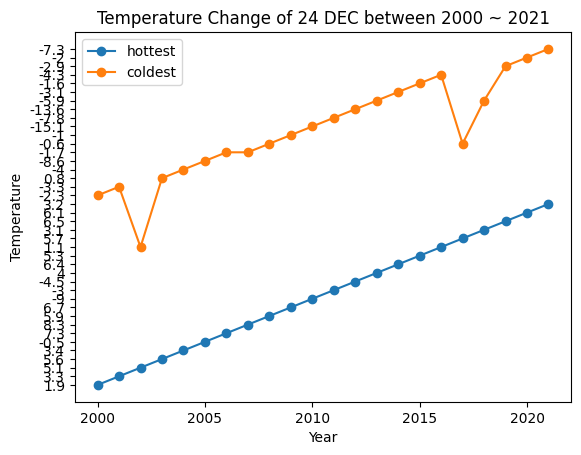

In [19]:
import matplotlib.pyplot as plt
import csv
dir = '/content/drive/MyDrive/고급파이썬프로그래밍/과제2/report2.csv'
f = open(dir, 'r')

data = csv.reader(f)
header=next(data)
result = []

for row in data:
    if row[0].endswith('12-24') == True:
        result.append(row)

hottest = []
for i in result:
    hottest.append(i[4])

coldest = []
for j in result:
    coldest.append(j[3])

import matplotlib.pyplot as plt

x = []
for i in range(2000, 2022):
    x.append(i)

plt.plot(x, hottest, marker='o', linestyle='-', label='hottest')
plt.plot(x, coldest, marker='o', linestyle='-', label='coldest')

plt.title('Temperature Change of 24 DEC between 2000 ~ 2021')
plt.xlabel('Year')
plt.ylabel('Temperature')

plt.legend(loc="upper left")

plt.show()